In [3]:
import numpy as np
import matplotlib.pyplot as plt

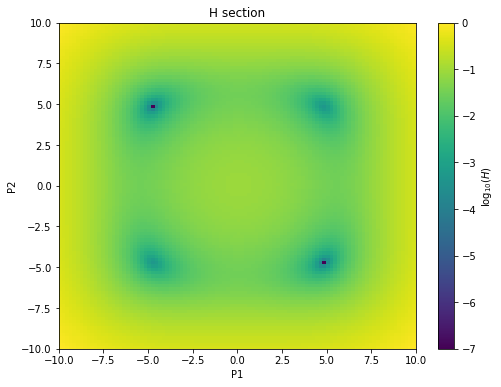

In [5]:
#===== Parameters =============================================================
dO = 20. #Detuning
dOT = 10. #Driving
g = .1 #Coupling
#==============================================================================
#===== Defining the analytical values of the symmetric/antisymmetric solutions 
z0 = np.sqrt( 1./(1.+3*g)*( dO + np.sqrt(dOT**2. - 1.) ) ) #Analytic solution for the (anti)symmetric complex amplitude
phi = np.pi/2. - np.arctan( 1./np.sqrt(dOT**2. - 1.) ) #Analytic solution for the (anti)symmetric complex phase
#==============================================================================
#===== Setting the Qs on the analytic values ==================================
Q1 = z0*np.exp( 1j*phi ).real #the Qs are only the real part of the complex variables
Q2 = Q1 #We set Q2 = Q1 ---- now the solution to be (anti)symmetric should fullfil P2 = P1 as well
#==============================================================================


#===== Let's evaluate the Hamiltonian as a function of the two remaining variables, P1 and P2
P1 = np.linspace(-10,10, 101 ) #we explore the Hamiltonian as a function of P1 and P2
P2 = P1
P1, P2 = np.meshgrid(P1, P2) 
#===== Here we define the Hamiltonian =========================================
H1 = .25 * ( P1**2. + Q1**2. )**2. - .5*dO * ( P1**2. + Q1**2. ) + .5*dOT * ( Q1**2. - P1**2. )    
H2 =  .25 * ( P2**2. + Q2**2. )**2. - .5*dO * ( P2**2. + Q2**2. ) + .5*dOT * ( Q2**2. - P2**2. )
Hint = (Q1**2. + P1**2.)*(P2**2. + Q2**2.) + .5 * (Q1**2. - P1**2.)*(Q2**2. - P2**2.) + 2 * Q1*Q2*P1*P2

H = H1 + H2 + g*Hint
#==============================================================================

#===== Let's plot the result on a 2D colorscale plot ==========================
#I normalize H to 1
maxH = np.amax(H)
minH = np.amin(H)
H = (H-minH)/(maxH-minH) + 0.0000001 #I include a small offset to not make the logscale crash

plt.figure(figsize=(8, 6))
plt.pcolormesh(P1, P2, np.log(H)/np.log(10.), cmap='viridis')  # Adjust the colormap as needed
plt.colorbar(label='$\log_{10}(H)$')  # Add colorbar with label
plt.xlabel('P1')
plt.ylabel('P2')
plt.title('H section')
plt.show()
#==============================================================================
#================================= End ========================================